<a href="https://colab.research.google.com/github/RuthMeryC/Data-visualization/blob/main/Proyecto1__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDICCION DE VENTA PARA UNA TIENDA MINORISTA DE ALIMENTOS

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#EDA

In [126]:
filename='/content/drive/MyDrive/CODINGDOJO/Proyecto/sales_predictions (1).csv'
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [127]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Revisamos - Item_Weight

In [129]:
nulos_IW=df['Item_Weight'].isna()
df.loc[nulos_IW,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [130]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Identificamos que hay valores en la columa Item_Identifier que tienen el mismo ID pero en la columna se encuntran vacios.

podemos usar la funcion lambda para llenar los datos que faltan, tomando en los ID de los productos que si tienen valor en la columna Item_Weight	para eso, vamos a agrupar por 'Item_Identifier' y llenar los datos con el método fillna.

transform


transform se utiliza para aplicar una función a cada grupo de datos en un DataFrame. En este caso, se aplica a cada grupo definido por el 'Item_Identifier' de producto.

Devuelve un DataFrame que tiene los mismos índices que el objeto original relleno con los valores transformados .

cuando se usa en un DataFrame agrupado y la función de transform devuelve un DataFrame

https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html


In [131]:
df['Item_Weight']= df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(method='ffill'))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [132]:
df['Item_Weight']= df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(method='bfill'))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [134]:
df_filtro=df.groupby('Item_Identifier')['Item_Weight'].count()
df_order=df_filtro.sort_values()
df_order

Item_Identifier
FDK57     0
FDQ60     0
FDE52     0
FDN52     0
DRF48     1
         ..
FDX20     9
FDF56     9
NCQ06     9
FDG33    10
FDW13    10
Name: Item_Weight, Length: 1559, dtype: int64

segun se puede obserbar hay 4 datos unicos en la comluma 'Item_Identifier' con valores nulos, por el momento se dejará pendiente estos valores y mas adelante se vera si aun se puede impotar o eliminar esas filas.

#Revisamos - Outlet_Size

In [135]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [136]:
nulos_OS=df['Outlet_Size'].isna()
df.loc[nulos_OS,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [137]:
nulos_OS.to_excel('nulos_Outlet_Size.xlsx')

##Encontrar relacion de otras columnas con Outlet_Size

In [138]:
df.isnull().sum().sum()

2414

In [139]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [140]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

hacemos un filtro para ver que registros contienen los valores nulos.

In [141]:
nulo_OS_OI= df[df['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()
nulo_OS_OI

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

dropna=False, filtra los valores nulos se tiene por cada 'Outlet_Identifier' de df filtro_id

In [142]:
filtro_id=df.loc[(df['Outlet_Identifier']=='OUT010')|(df['Outlet_Identifier']=='OUT045')|(df['Outlet_Identifier']=='OUT017'),:]
filtro_id['Outlet_Identifier'].value_counts(dropna=False)

Outlet_Identifier
OUT045    929
OUT017    926
OUT010    555
Name: count, dtype: int64

Se agrupa los valores 'Outlet_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Establishment_Year', para analizar que relacion guardan entre ellas y se suma los valores de la columna'Item_Outlet_Sales'.

In [143]:
df_relacion1=df.groupby(by=['Outlet_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Establishment_Year'], dropna=False)[['Item_Outlet_Sales']].sum().round()
df_relacion1

Item_Outlet_Sales
Outlet_Type       Outlet_Size Outlet_Identifier Outlet_Location_Type Outlet_Establishment_Year                   
Grocery Store     Small       OUT019            Tier 1               1985                                179694.0
                  NaN         OUT010            Tier 3               1998                                188340.0
Supermarket Type1 High        OUT013            Tier 3               1987                               2142664.0
                  Medium      OUT049            Tier 1               1999                               2183970.0
                  Small       OUT035            Tier 2               2004                               2268123.0
                              OUT046            Tier 1               1997                               2118395.0
                  NaN         OUT017            Tier 2               2007                               2167465.0
                              OUT045            Tier 2               2002                               2036725.0
Supermarket Type2 Medium      OUT018            Tier 3               2009                               1851823.0
Supermarket Type3 Medium      OUT027            Tier 3               1985                               3453926.0

Grocery Store:

En el tipo de tienda Grocery Store, podemos observar que Outlet_Size, Small esta conformada por una tienda, OUT019, con una venta de 179,694.00 um, similar a la tienda OUT010, por lo que podemos deducir que es una tienda **Outlet_Size	'Small'.**

Supermarket Type1:

En el tipo de tienda Supermarket Type1, podemos observar que Outlet_Size, Samll  esta conformada por dos tiendas, OUT035 y OUT046, con ventas de 2'183,970, 2'118,395 UM respectivamente, muy similar a las tiendas OUT017 y OUT045, por lo que podemos deducir que es una tienda **Outlet_Size 'Small'**


In [144]:
filtro_5=df[(df['Outlet_Type']=='Grocery Store') & df['Outlet_Size'].isna()]
filtro_6=df[(df['Outlet_Type']=='Supermarket Type1') & df['Outlet_Size'].isna()]
df.loc[filtro_5.index,'Outlet_Size']='Small'
df.loc[filtro_6.index,'Outlet_Size']='Small'

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Revisamos - Item_Fat_Content

In [146]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

solo se tiene dos valores en la carateristica ''Item_Fat_Content':"si el producto es Low Fat o Regular".

Se observa que hay cinco valores distintos, que son: Low Fat, Regular, LF, reg, low fat. Por lo que, podemos decir que hay valores que hacen referencia Low Fat o Regular de la siguiente manera:

*   LF = Low Fat
*   reg = Regular
*   low fat = Low Fat

In [147]:
df['Item_Fat_Content'].replace('LF','Low Fat', inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat', inplace=True)
df['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [148]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Eliminar valores vacios -Item_Weight

In [150]:
nulos_IW=df['Item_Weight'].isna()
total_nulos=df.loc[nulos_IW,:]
total_nulos

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [151]:
nulo_II_OW= df[df['Item_Weight'].isnull()]['Item_Identifier'].unique()
nulo_II_OW

array(['FDN52', 'FDK57', 'FDE52', 'FDQ60'], dtype=object)

In [152]:
total_Sales=total_nulos.groupby(['Item_Identifier'])[['Item_Outlet_Sales']].sum()
total_Sales

,Item_Outlet_Sales
Item_Identifier,
FDE52,3453.5046
FDK57,4434.2280
FDN52,1569.9564
FDQ60,120.5098


Debido a que son datos únicos y no podemos obtener los valores de 'FDN52', 'FDK57', 'FDE52', 'FDQ60' en la caracteristica Item_Weight, se procede con su eliminacion. Asimismo, la cantidad de los datos eliminados, en este caso 4 datos, no afectará nuestro análisis.

Tambien podemos decir que el valor total en la caracteristica Item_Outlet_Sales suman solo 9,579 um.

In [153]:
df.dropna(subset=['Item_Weight'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


#Visualización de gráficos.

In [154]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [155]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

##Análisis del total de productos por tipo de producto

In [156]:
df_2=df.groupby(['Item_Type'])[['Item_Identifier']].count().reset_index()
df_2

,Item_Type,Item_Identifier
0,Baking Goods,647
1,Breads,251
2,Breakfast,110
3,Canned,649
4,Dairy,681
5,Frozen Foods,855
6,Fruits and Vegetables,1232
7,Hard Drinks,214
8,Health and Hygiene,520
9,Household,910


In [157]:
lista=list(df_2['Item_Type'].unique())
lista

['Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods']

In [158]:
lista_2=df_2['Item_Type'].unique()
lista_2

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

<ipython-input-159-5b1a88bf1587>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-159-5b1a88bf1587>:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


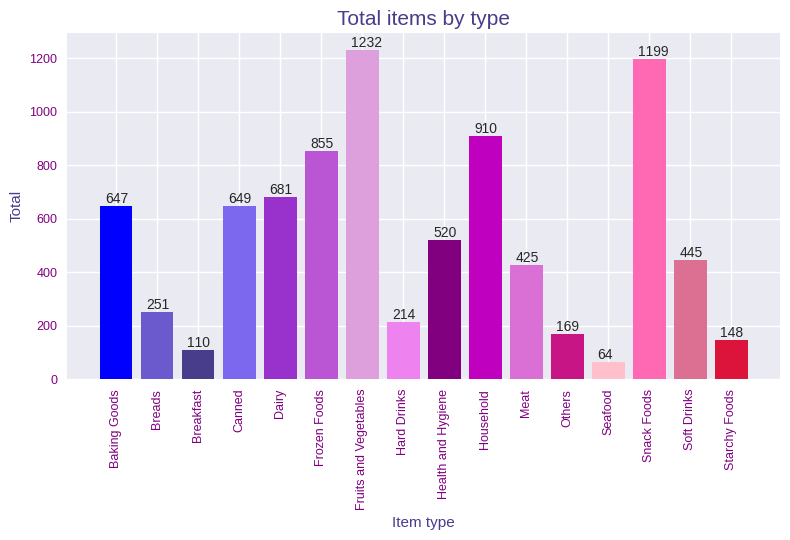

In [159]:
plt.style.use('seaborn')
bar_colors=['blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'darkorchid', 'mediumorchid', 'plum', 'violet', 'purple', 'm', 'orchid', 'mediumvioletred', 'pink', 'hotpink', 'palevioletred', 'crimson']
width = 0.25
fig, ax = plt.subplots(layout='constrained')

bars=plt.bar(df_2['Item_Type'], df_2['Item_Identifier'], color=bar_colors)
plt.ylabel('Total',color='darkslateblue')
plt.xlabel("Item type", color='darkslateblue')
plt.xticks(fontsize = 9, color='purple', rotation = 90);
plt.yticks(fontsize = 9, color='purple')
plt.title("Total items by type", color='darkslateblue', fontsize=15 )
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x()+ bar.get_width()/6, yval, round(yval, 2), va='bottom')
plt.tight_layout()
plt.legend()
plt.show()

En el gáfico podemos observar el total de productos por categoria de producto. Podemos observar que las categorias de producto con mayor numero de productos es 'Fruits and vegetables' con 1,232 unidades y 'Snack foods' con 1,199 unidades.

##Análisis del total de productos bajo en grasa por categoria de producto (Low Fat) y regular (Regular)

In [160]:
df_lf=df[(df['Item_Fat_Content']=='Low Fat')]
df_lf_it=df_lf.groupby(['Item_Type'])[['Item_Identifier']].count().reset_index()
df_lf_it=df_lf_it.sort_values(by='Item_Identifier', ascending=True)
df_lf_it

,Item_Type,Item_Identifier
12,Seafood,37
2,Breakfast,41
15,Starchy Foods,82
1,Breads,140
11,Others,169
10,Meat,170
7,Hard Drinks,214
0,Baking Goods,329
3,Canned,341
14,Soft Drinks,374


In [161]:
lista_lf=list(df_lf_it['Item_Type'].values)
lista_lf

['Seafood',
 'Breakfast',
 'Starchy Foods',
 'Breads',
 'Others',
 'Meat',
 'Hard Drinks',
 'Baking Goods',
 'Canned',
 'Soft Drinks',
 'Dairy',
 'Frozen Foods',
 'Health and Hygiene',
 'Fruits and Vegetables',
 'Snack Foods',
 'Household']

In [162]:
df_r=df[(df['Item_Fat_Content']=='Regular')]
df_r_it=df_r.groupby(['Item_Type'])[['Item_Identifier']].count().reset_index()
df_r_it=df_r_it.sort_values(by='Item_Identifier', ascending=True)
df_r_it

,Item_Type,Item_Identifier
8,Seafood,27
11,Starchy Foods,66
2,Breakfast,69
10,Soft Drinks,71
1,Breads,111
7,Meat,255
4,Dairy,263
3,Canned,308
0,Baking Goods,318
5,Frozen Foods,405


<ipython-input-163-2de87d68ecca>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


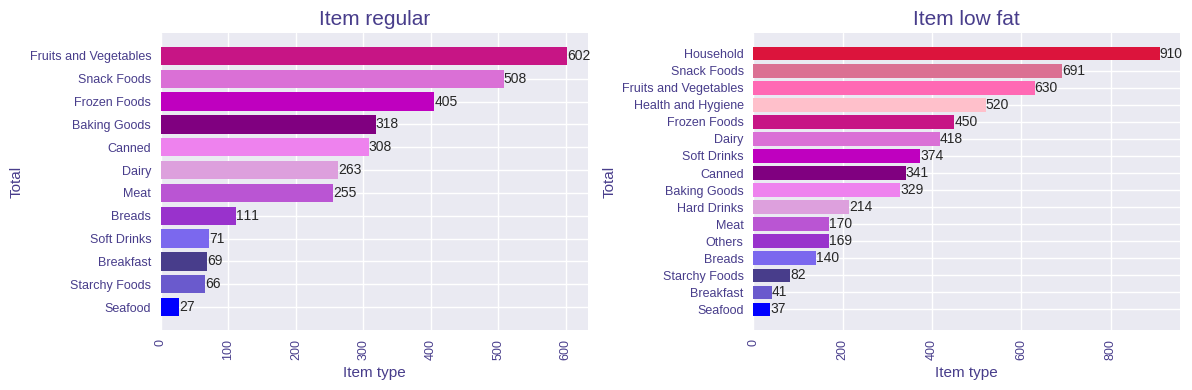

In [163]:
plt.style.use('seaborn')
bar_colors=['blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'darkorchid', 'mediumorchid', 'plum', 'violet', 'purple', 'm', 'orchid', 'mediumvioletred', 'pink', 'hotpink', 'palevioletred', 'crimson']
plt.figure(figsize=(12,4))

# Subplot 1
plt.subplot(1, 2, 1);

bars=plt.barh(df_r_it['Item_Type'], df_r_it['Item_Identifier'], 0.8, color=bar_colors )
plt.xlabel("Item type", color='darkslateblue', fontsize=11)
plt.ylabel('Total', color='darkslateblue', fontsize=11)
plt.xticks(fontsize=9, color='darkslateblue', rotation=90)
plt.yticks(fontsize=9, color='darkslateblue')
plt.title('Item regular', color='darkslateblue',fontsize=15)
for bar in bars:
  xval=bar.get_width()
  plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval,2), ha='left', va='center')
plt.tight_layout()
#plt.legend()

# Subplot 2
plt.subplot(1, 2, 2);

bar_colors=['blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'darkorchid', 'mediumorchid', 'plum', 'violet', 'purple', 'm', 'orchid', 'mediumvioletred', 'pink', 'hotpink', 'palevioletred', 'crimson']

bars=plt.barh(df_lf_it['Item_Type'], df_lf_it['Item_Identifier'], 0.8, color=bar_colors )
plt.xlabel("Item type", color='darkslateblue', fontsize=11)
plt.ylabel('Total', color='darkslateblue')
plt.xticks(fontsize=9, color='darkslateblue', rotation=90)
plt.yticks(fontsize=9, color='darkslateblue')
plt.title('Item low fat', color='darkslateblue',fontsize=15)
for bar in bars:
  xval=bar.get_width()
  plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval,2), ha='left', va='center')
plt.tight_layout()
#plt.legend()


  *En el gráfico 1, podemos observar el total de productos regular por categoria de producto. La categoria de producto 'Fruits and vegetables' tiene el mayor número de productos; 602 productos regular.

  *En gráfico 2, podemos observar el total de productos bajo en grasa por categoria de producto. La categoria de producto 'Household' tiene el mayor número de productos; 910 productos bajo en grasa.

##Análisis del porcentaje de ventas por Supermercados o almacén.

In [164]:
df_3=df.groupby(['Outlet_Type' ])[['Item_Outlet_Sales']].sum().round().reset_index()
df_3

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,367914.0
1,Supermarket Type1,12917342.0
2,Supermarket Type2,1851823.0
3,Supermarket Type3,3444468.0


<ipython-input-165-7f3cf368796a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


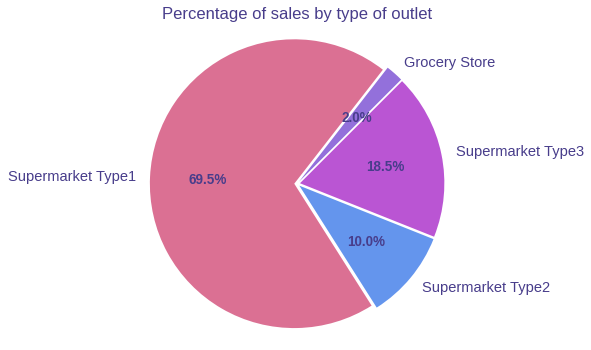

In [165]:
plt.style.use('seaborn')

explotar=(0.02,0.02,0.02,0.02,)

fig1=plt.figure(dpi=75)
ax1=fig1.add_subplot(1,1,1)

wedges, texts, autotexts = ax1.pie(df_3['Item_Outlet_Sales'], labels=df_3['Outlet_Type'], autopct='%1.1f%%', textprops=dict(color="darkslateblue"), explode=explotar, startangle=45, colors=['mediumpurple', 'palevioletred', 'cornflowerblue', 'mediumorchid'])
plt.setp(autotexts, size=13, weight="bold", color='darkslateblue')
plt.setp(texts, size=14 )
ax1.axis('equal')

ax1.set_title('Percentage of sales by type of outlet', color='darkslateblue', fontsize=16)

plt.show()

En el gráfico se observa el porcentaje de ventar por Supermarket y Grocery Store.

Supermarket Type1 tiene el mayor porcentaje de ventas con 69.5% del total de ventas.

##Análisis del total de establecimientos que coforman cada Supermercado o almacén.

In [166]:
df_4=df.groupby('Outlet_Type')[['Outlet_Identifier']].count().round().reset_index()
df_4

,Outlet_Type,Outlet_Identifier
0,Grocery Store,1082
1,Supermarket Type1,5577
2,Supermarket Type2,928
3,Supermarket Type3,932


<ipython-input-167-f18d09710163>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Total outlet by oulet type')

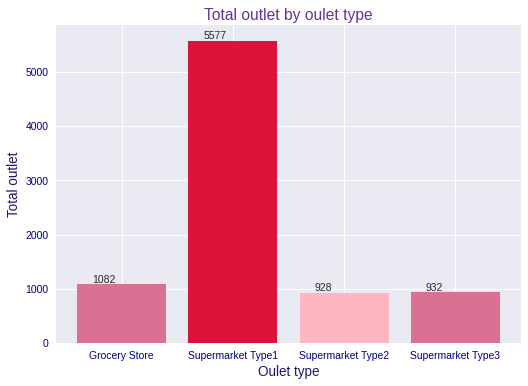

In [167]:
plt.style.use('seaborn')
bar_color=('palevioletred', 'crimson', 'lightpink')

plt.figure(dpi=75)

#width=0.5
bars=plt.bar(df_4['Outlet_Type'], df_4['Outlet_Identifier'], color=bar_color)
plt.xlabel('Oulet type', color='midnightblue', fontsize='13')
plt.ylabel('Total outlet', color='midnightblue', fontsize='13')
plt.xticks(fontsize=10, color='darkblue')
plt.yticks(fontsize=10, color='darkblue')
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom' )
plt.title('Total outlet by oulet type', fontsize=15, color='rebeccapurple')

Text(0.5, 1.0, 'Percentage of outlet by type of outlet')

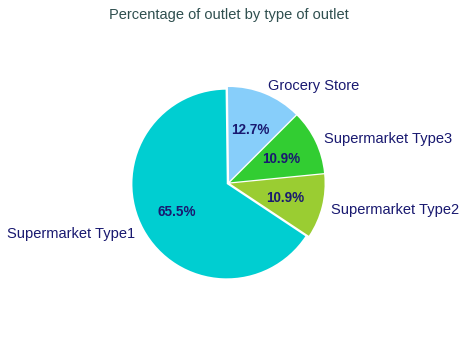

In [168]:
explotar=(0.02,0.02,0.02,0.02,)

fig1=plt.figure(dpi=75)
ax1=fig1.add_subplot(1,2,2)

wedges, texts, autotexts = ax1.pie(df_4['Outlet_Identifier'], labels=df_4['Outlet_Type'], autopct='%1.1f%%', textprops=dict(color="midnightblue"), explode=explotar, startangle=45, colors=['lightskyblue', 'darkturquoise', 'yellowgreen', 'limegreen'])
plt.setp(autotexts, size=13, weight="bold", color='midnightblue')
plt.setp(texts, size=14 )
ax1.axis('equal')

ax1.set_title('Percentage of outlet by type of outlet', color='darkslategray', fontsize=14)



En el gráfico, se puede observar el supermercado o almacén con mayor número de tiendas.

Supermarket type1 tiene la mayor cantidad de tiendas con 5,577 que corresponde a un 65.5% del total de tiendas.

##Análisis de las tiendas con mayor ingreso de ventas(Outlet_Identifier).

In [169]:
df_5=df.groupby(['Outlet_Identifier','Outlet_Type'])[['Item_Outlet_Sales']].sum().round().reset_index()
df_6=df_5.sort_values(by='Item_Outlet_Sales', ascending=False)
df_6

,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
5,OUT027,Supermarket Type3,3444468.0
6,OUT035,Supermarket Type1,2268123.0
9,OUT049,Supermarket Type1,2183970.0
2,OUT017,Supermarket Type1,2167465.0
1,OUT013,Supermarket Type1,2142664.0
8,OUT046,Supermarket Type1,2118395.0
7,OUT045,Supermarket Type1,2036725.0
3,OUT018,Supermarket Type2,1851823.0
0,OUT010,Grocery Store,188340.0
4,OUT019,Grocery Store,179574.0


<ipython-input-170-47a201509c2f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


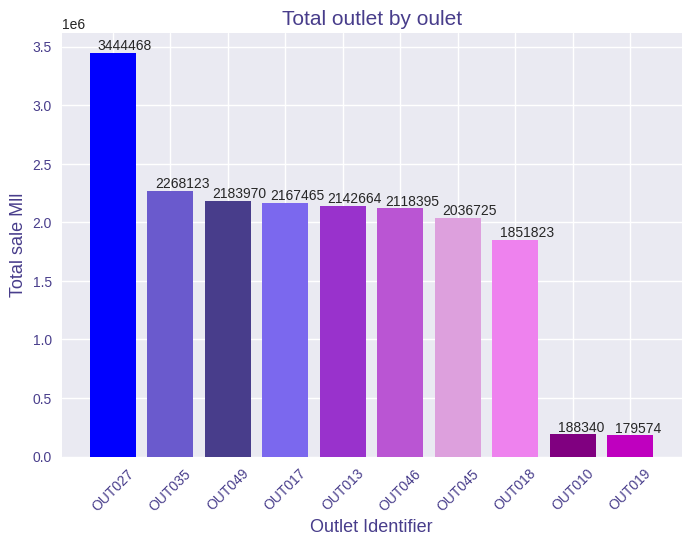

In [170]:
plt.style.use('seaborn')
#bar_color=('darkturquoise', 'cadetblue', 'cadetblue', 'cadetblue', 'cadetblue', 'cadetblue', 'cadetblue', 'deepskyblue', 'steelblue')
bar_color=('blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'darkorchid', 'mediumorchid', 'plum', 'violet', 'purple', 'm', 'orchid', 'mediumvioletred', 'pink', 'hotpink', 'palevioletred', 'crimson')
#width=0.5
bars=plt.bar(df_6['Outlet_Identifier'], df_6['Item_Outlet_Sales'], color=bar_color)
plt.xlabel('Outlet Identifier', color='darkslateblue', fontsize='13')
plt.ylabel('Total sale Mll', color='darkslateblue', fontsize='13')
plt.xticks(fontsize=10, color='darkslateblue', rotation=45)
plt.yticks(fontsize=10, color='darkslateblue')
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom' )
plt.title('Total outlet by oulet', fontsize=15, color='darkslateblue')
plt.show()

En el gràfico podemos observar OUT027 y OUT035 tienen las ventas más altas con 3.4 mill y 2.3 mill um respectivamente.

Tambien podemos decir que las tiendas OUT010 y OUT019 tienen las ventas más bajas con 1.9 mill y 1.8 mill um respectivamente.

##Analizamos los parametros de la tienda OUT027 y OUT035 que tienen la mayor venta.

In [171]:
df_10=df.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Establishment_Year','Outlet_Type'])[['Item_Outlet_Sales']].sum().round().reset_index()
df_11=df_10.sort_values(by='Item_Outlet_Sales', ascending=False)
df_11

,Outlet_Identifier,Outlet_Size,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales
5,OUT027,Medium,1985,Supermarket Type3,3444468.0
6,OUT035,Small,2004,Supermarket Type1,2268123.0
9,OUT049,Medium,1999,Supermarket Type1,2183970.0
2,OUT017,Small,2007,Supermarket Type1,2167465.0
1,OUT013,High,1987,Supermarket Type1,2142664.0
8,OUT046,Small,1997,Supermarket Type1,2118395.0
7,OUT045,Small,2002,Supermarket Type1,2036725.0
3,OUT018,Medium,2009,Supermarket Type2,1851823.0
0,OUT010,Small,1998,Grocery Store,188340.0
4,OUT019,Small,1985,Grocery Store,179574.0


Podemos observar que la tienda OUT027 y OUT035 no comparten parametros en común, sin embargo podemos decir de la tienda OUT027, es una de las primeras tiendas que fue creada; por lo que posiblemente tenga un alto reconocimiento dentro del mercado y sea una de las caracteristicas que influye en el volumen de sus ventas.

###Analizamos la cantidad de productos que ofrece la tienda OUT027 y OUT035

In [172]:
df_12=df.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Type'])[['Item_Identifier']].count().reset_index()
df_13=df_12.sort_values(by='Item_Identifier', ascending=False)
df_13

,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Identifier
1,OUT013,High,Supermarket Type1,932
5,OUT027,Medium,Supermarket Type3,932
6,OUT035,Small,Supermarket Type1,930
8,OUT046,Small,Supermarket Type1,930
9,OUT049,Medium,Supermarket Type1,930
7,OUT045,Small,Supermarket Type1,929
3,OUT018,Medium,Supermarket Type2,928
2,OUT017,Small,Supermarket Type1,926
0,OUT010,Small,Grocery Store,555
4,OUT019,Small,Grocery Store,527


<ipython-input-173-b9eb90956a66>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


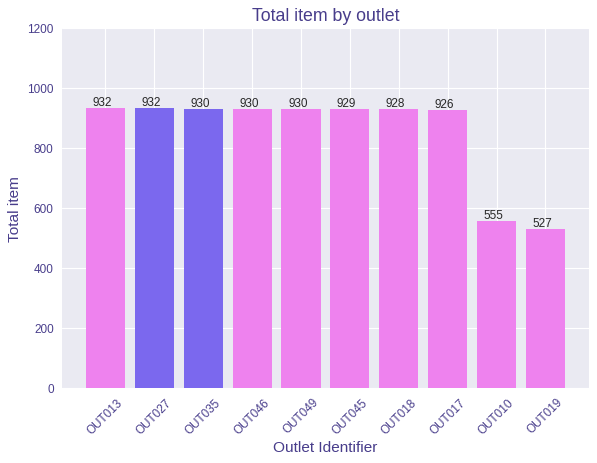

In [173]:
plt.style.use('seaborn')
plt.figure(dpi=85)
bar_color=('violet', 'mediumslateblue', 'mediumslateblue', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet')
#width=0.5
bars=plt.bar(df_13['Outlet_Identifier'], df_13['Item_Identifier'], color=bar_color)
plt.xlabel('Outlet Identifier', color='darkslateblue', fontsize='13')
plt.ylabel('Total item', color='darkslateblue', fontsize='13')
plt.xticks(fontsize=10, color='darkslateblue', rotation=45)
plt.yticks(fontsize=10, color='darkslateblue')
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom')
#plt.xlim(left=1892,right=2020)
plt.ylim(bottom=0,top=1200)
plt.title('Total item by outlet', fontsize=15, color='darkslateblue')
plt.show()

En el gráfico podemos observar que la tienda OUT027 y OUT035 estan dentro de las tiendas que tienen mayor número de productos.

###Análisis de los productos que tienen mayor ingreso de ventas.

In [174]:
df_14=df.groupby(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_MRP'])[['Item_Outlet_Sales']].sum().reset_index()
df_15=df_14.sort_values(by='Item_Outlet_Sales', ascending=False).head(20)
df_15

,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Type,Item_MRP,Item_Outlet_Sales
7167,NCE42,Household,OUT027,Supermarket Type3,234.9958,13086.9648
4283,FDQ19,Fruits and Vegetables,OUT027,Supermarket Type3,242.6512,12117.5600
6732,FDZ20,Fruits and Vegetables,OUT027,Supermarket Type3,253.0356,11445.1020
4118,FDP33,Snack Foods,OUT027,Supermarket Type3,254.2672,10993.6896
2727,FDI50,Canned,OUT027,Supermarket Type3,228.0352,10306.5840
2049,FDF39,Dairy,OUT013,Supermarket Type1,261.2910,10256.6490
5345,FDU14,Dairy,OUT027,Supermarket Type3,248.3750,10236.6750
7296,NCH18,Household,OUT027,Supermarket Type3,245.2802,10072.8882
7612,NCM05,Health and Hygiene,OUT046,Supermarket Type1,262.5226,9779.9362
1350,FDC17,Frozen Foods,OUT027,Supermarket Type3,208.9928,9678.0688


<ipython-input-175-ca905ccf85a0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


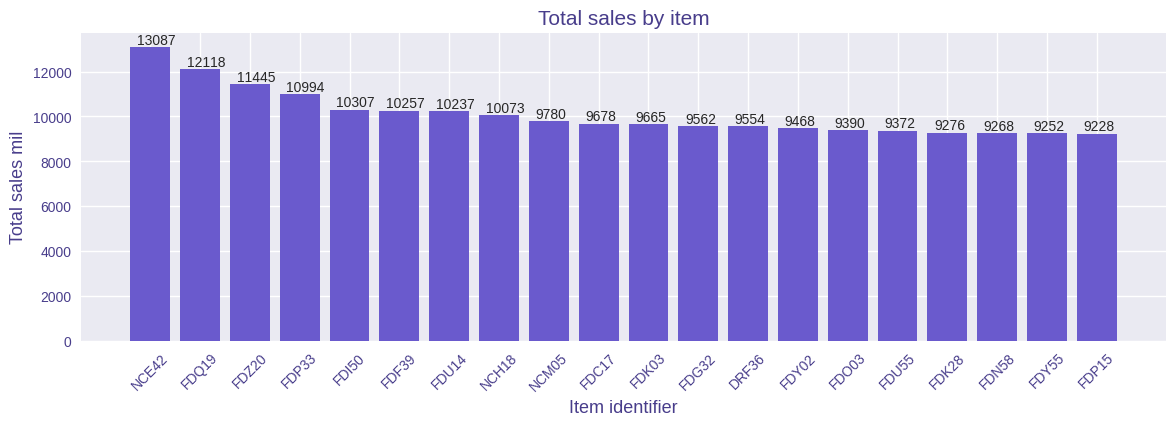

In [175]:
plt.style.use('seaborn')
plt.figure(figsize=(14,4))
bar_color=('slateblue')
#width=0.5
bars=plt.bar(df_15['Item_Identifier'], df_15['Item_Outlet_Sales'], color=bar_color)
plt.xlabel('Item identifier', color='darkslateblue', fontsize='13')
plt.ylabel('Total sales mil', color='darkslateblue', fontsize='13')
plt.xticks(fontsize=10, color='darkslateblue', rotation=45)
plt.yticks(fontsize=10, color='darkslateblue')
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom')
#plt.xlim(left=1892,right=2020)
#plt.ylim(bottom=0,top=1200)
plt.title('Total sales by item', fontsize=15, color='darkslateblue')
plt.show()

En el gráfico se puede observar los 20 productos con mayor ingreso de ventas.

###Análisis de los productos con mayor ingreso de ventas en las tiendas OUT027 y OUT035.

Las tiendas con mayor volumen de ventas en unidades monetarias.

In [176]:
fil_7=df[(df['Outlet_Identifier']=='OUT027')]
df_16=fil_7.groupby(['Item_Identifier', 'Item_Type'])[['Item_Outlet_Sales']].sum().reset_index()
df_17=df_16.sort_values(by='Item_Outlet_Sales', ascending=False).head(10)
df_17

,Item_Identifier,Item_Type,Item_Outlet_Sales
781,NCE42,Household,13086.9648
462,FDQ19,Fruits and Vegetables,12117.5600
734,FDZ20,Fruits and Vegetables,11445.1020
444,FDP33,Snack Foods,10993.6896
286,FDI50,Canned,10306.5840
576,FDU14,Dairy,10236.6750
796,NCH18,Household,10072.8882
142,FDC17,Frozen Foods,9678.0688
235,FDG32,Fruits and Vegetables,9562.2196
24,DRF36,Soft Drinks,9554.2300


<ipython-input-177-9af128838e25>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Total sales by item type -outlet OUT027')

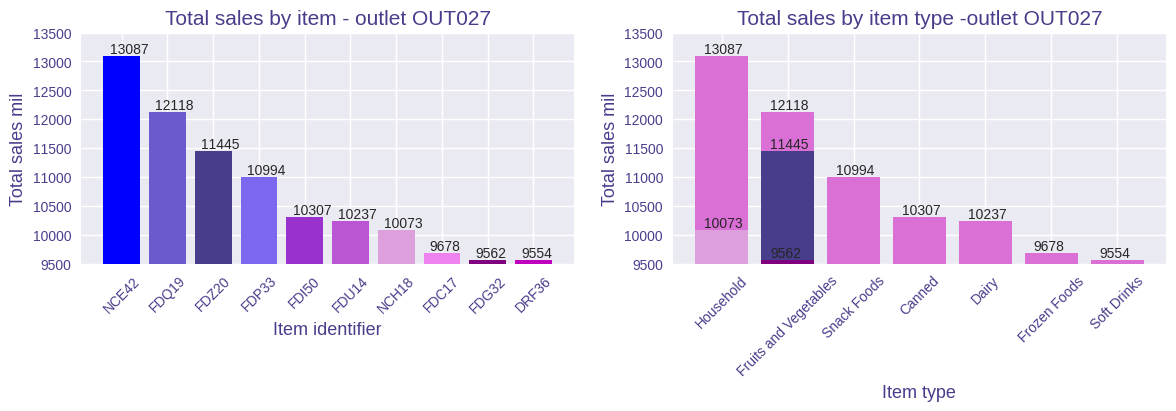

In [177]:
plt.style.use('seaborn')
plt.figure(figsize=(14,3))

# Subplot 1
plt.subplot(1, 2, 1);
bar_color=('blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'darkorchid', 'mediumorchid', 'plum', 'violet', 'purple', 'm', 'orchid', 'mediumvioletred', 'pink', 'hotpink', 'palevioletred', 'crimson')
bars=plt.bar(df_17['Item_Identifier'], df_17['Item_Outlet_Sales'], color=bar_color)
plt.xlabel('Item identifier', color='darkslateblue', fontsize='13')
plt.ylabel('Total sales mil', color='darkslateblue', fontsize='13')
plt.xticks(fontsize=10, color='darkslateblue', rotation=45)
plt.yticks(fontsize=10, color='darkslateblue')
plt.ylim(bottom=9500,top=13500)
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom')
plt.title('Total sales by item - outlet OUT027', fontsize=15, color='darkslateblue')

# Subplot 2
plt.subplot(1,2,2);
bar_color1=('orchid','orchid','darkslateblue','orchid','orchid','orchid','plum','orchid','purple','orchid')
bars=plt.bar(df_17['Item_Type'], df_17['Item_Outlet_Sales'], color=bar_color1)
plt.xlabel('Item type', color='darkslateblue', fontsize='13')
plt.ylabel('Total sales mil', color='darkslateblue', fontsize='13')
plt.xticks(fontsize=10, color='darkslateblue', rotation=45)
plt.yticks(fontsize=10, color='darkslateblue')
plt.ylim(bottom=9500,top=13500)
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom')
plt.title('Total sales by item type -outlet OUT027', fontsize=15, color='darkslateblue')


*   En el gráfico 1, podemos observar las ventas de los 10 productos con mayor ingreso en la tienda OUT027.
*   En el gráfico 2, las categorias a las que perteneces los 10 productos con mayor ingreso por ventas en la tienda OUT027.



In [178]:
fil_8=df[(df['Outlet_Identifier']=='OUT035')]
df_18=fil_8.groupby(['Item_Identifier','Item_Type'])[['Item_Outlet_Sales']].sum().reset_index()
df_19=df_18.sort_values(by='Item_Outlet_Sales', ascending=False).head(10)
df_19

,Item_Identifier,Item_Type,Item_Outlet_Sales
293,FDI15,Dairy,8479.6288
136,FDB37,Baking Goods,7931.6754
684,FDX09,Snack Foods,7763.2280
315,FDJ15,Dairy,7534.1928
517,FDR16,Frozen Foods,7266.5412
784,NCE18,Household,7240.5750
428,FDN58,Snack Foods,7182.6504
198,FDE11,Starchy Foods,7033.5112
751,FDZ43,Fruits and Vegetables,7028.1848
596,FDT59,Breads,6911.0040


<ipython-input-179-095cf5f0bd72>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Total sales by item type -outlet OUT035')

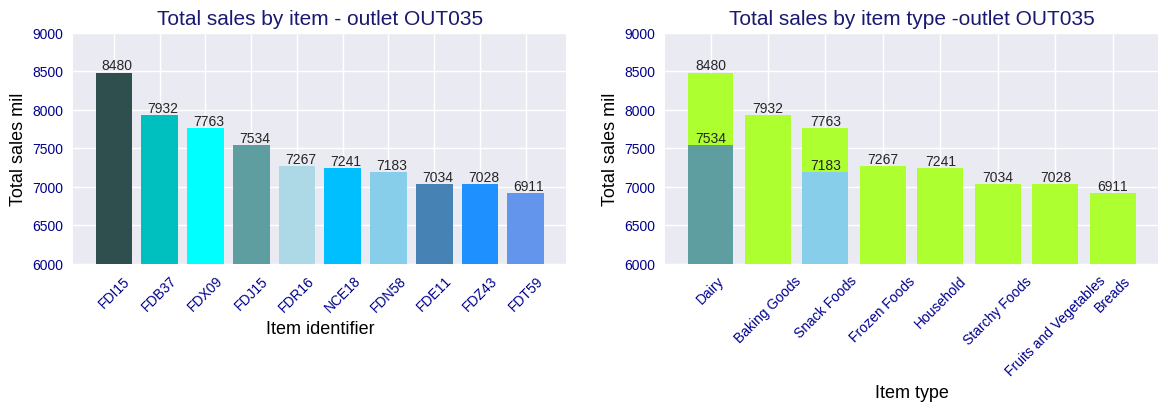

In [179]:
plt.style.use('seaborn')
plt.figure(figsize=(14,3))

# Subplot 1
plt.subplot(1, 2, 1);
bar_color=('darkslategrey','c','cyan','cadetblue','lightblue','deepskyblue','skyblue','steelblue','dodgerblue','cornflowerblue')
bars=plt.bar(df_19['Item_Identifier'], df_19['Item_Outlet_Sales'], color=bar_color)
plt.xlabel('Item identifier', color='k', fontsize='13')
plt.ylabel('Total sales mil', color='k', fontsize='13')
plt.xticks(fontsize=10, color='darkblue', rotation=45)
plt.yticks(fontsize=10, color='darkblue')
plt.ylim(bottom=6000,top=9000)
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom')
plt.title('Total sales by item - outlet OUT035', fontsize=15, color='midnightblue')

# Subplot 2
plt.subplot(1,2,2);
bar_color1=('greenyellow','greenyellow', 'greenyellow','cadetblue','greenyellow','greenyellow','skyblue','greenyellow','greenyellow','greenyellow')
bars=plt.bar(df_19['Item_Type'], df_19['Item_Outlet_Sales'], color=bar_color1)
plt.xlabel('Item type', color='k', fontsize='13')
plt.ylabel('Total sales mil', color='k', fontsize='13')
plt.xticks(fontsize=10, color='darkblue', rotation=45)
plt.yticks(fontsize=10, color='darkblue')
plt.ylim(bottom=6000,top=9000)
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval), va='bottom')
plt.title('Total sales by item type -outlet OUT035', fontsize=15, color='midnightblue')

*   En el gráfico 1, podemos observar las ventas de los 10 productos con mayor ingreso en la tienda OUT035.
*   En el gráfico 2, las categorias a las que perteneces los 10 productos con mayor ingreso por ventas en la tienda OUT035.

#Coclusión

In [180]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*   La empresa dedicada a la venta de alimentos cuenta 8523, sin embargo 4 de ellos no cuentan con datos suficientes para incluirlos en el análisis, por lo que se tomo **8519 productos** para el análisis.
*   La empresa ofrece productos **bajo en grasa y regular**; cada uno de ellos cuenta con 16 y 12 categorias.
  *   Productos bajo en grasa: La categoria **Household** tiene 910 productos y es la categoria con mayor número de productos.
  *   Productos regular: La categoria **Fruits and Vegetables**	 tiene 602 productos y es la categoria con mayor número de productos.
*   Se hizo un análisis del porcentaje de ventas por Supermercados o almacén, teniendo como resultado a **Supermarket type1** con una participación de **69.5%**, Supermarket type3 con 18.5%, Supermarket type2 con 10% y Grocery store con 2%.
*   Se hizo un análisis del total de establecimientos que coforman cada Supermercado o almacén, teniendo como resultado a **Supermarket type1** con  **65.5%**,Grocery store con 12.7% y Supermarket type2 y Supermarket type3 con 10.9% cada una.
*   Posterior al análisis de establecimientos, se hizo un análisis de la tiendas comn mayor ingreso de ventas, teniendo como resultado a las tienda con mayor ingreso de venta **OUT027 y OUT035 con 3.4 mill y 2.3 mill** um respectivamente y las tiendas con menor ingreso de ventas OUT010 y OUT019 con 1.9 mill y 1.8 mill um respectivamente.
*   La tienda **OUT027 y OUT035 cuenta con 932 y 930 productos** respectivamente que se encuntra dentro de las tiendas con mayor numero de productos, asimísmo, la tienda OUT010 y OUT019 ceunta con 555 y 527 productos respectivamente, siendo las tiendas con menor numero de productos.
*   Se hizo un análisis de los productos con mayor ingreso de ventas en las tiendas **OUT027**. El producto **NCE42 y FDQ19** son los producto que tienen el **ingreso más alto en ventas con 13,087 y 12,118 um**, que se encuentran dentro de las categorias Household y Fruits and vegetables respectivamente.
*   Elemento de lista Se hizo un análisis de los productos con mayor ingreso de ventas en las tiendas **OUT035**. El producto** FDI15 y FDB37** son los producto que tienen el i**ngreso más alto en ventas con 8,480 y 7,932 um**, que se encuentran dentro de las categorias Dairy y Baking Goods respectivamente.










##Visualización

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [182]:
colum_cat=df.select_dtypes(exclude=['int64','float'])
for colum in colum_cat:
    print(f"Categoria {colum}")
    print(sorted(df[colum].unique()))
    print(                                                         )

Categoria Item_Identifier
['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48', 'DRC01', 'DRC12', 'DRC13', 'DRC24', 'DRC25', 'DRC27', 'DRC36', 'DRC49', 'DRD01', 'DRD12', 'DRD13', 'DRD15', 'DRD24', 'DRD25', 'DRD27', 'DRD37', 'DRD49', 'DRD60', 'DRE01', 'DRE03', 'DRE12', 'DRE13', 'DRE15', 'DRE25', 'DRE27', 'DRE37', 'DRE48', 'DRE49', 'DRE60', 'DRF01', 'DRF03', 'DRF13', 'DRF15', 'DRF23', 'DRF25', 'DRF27', 'DRF36', 'DRF37', 'DRF48', 'DRF49', 'DRF51', 'DRF60', 'DRG01', 'DRG03', 'DRG11', 'DRG13', 'DRG15', 'DRG23', 'DRG25', 'DRG27', 'DRG36', 'DRG37', 'DRG39', 'DRG48', 'DRG49', 'DRG51', 'DRH01', 'DRH03', 'DRH11', 'DRH13', 'DRH15', 'DRH23', 'DRH25', 'DRH36', 'DRH37', 'DRH39', 'DRH49', 'DRH51', 'DRH59', 'DRI01', 'DRI03', 'DRI11', 'DRI13', 'DRI23', 'DRI25', 'DRI37', 'DRI39', 'DRI47', 'DRI49', 'DRI51', 'DRI59', 'DRJ01', 'DRJ11', 'DRJ13', 'DRJ23', 'DRJ24', 'DRJ25', 'DRJ35', 'DRJ37', 'DRJ39', 'DRJ47', 'DRJ49', 'DRJ51', 'DRJ59', 'DRK01', 'DRK11', 'DRK12', 'DRK13', 'DRK23', 'DRK35', '

In [183]:
df_graf=df.select_dtypes(include='number')

<Axes: >

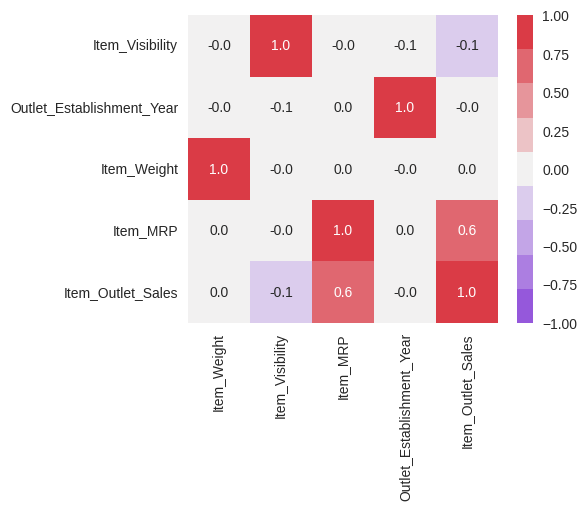

In [184]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(df_graf.corr().sort_values(by=['Item_Outlet_Sales']), cmap=sns.diverging_palette(280,10, n=9), annot=True, fmt='.1f', vmin=-1, vmax=1)

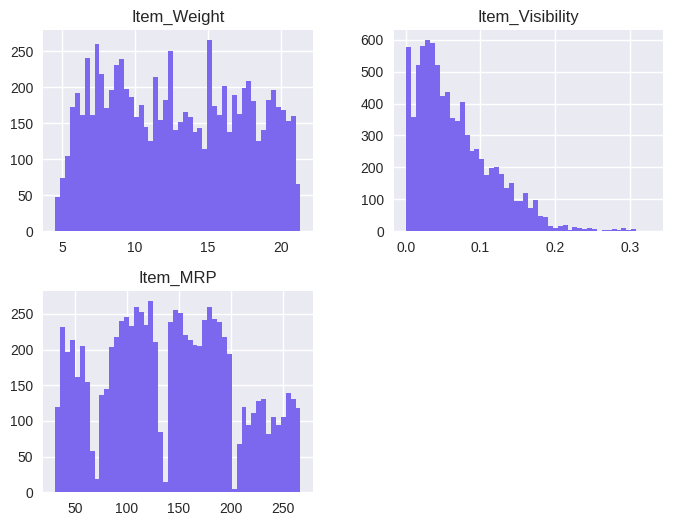

In [185]:
df_graf.drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year']).hist(bins=50, figsize=(8,6), color='mediumslateblue')
plt.show()

In [186]:
import seaborn as sns

In [187]:
df_graf=df_graf.drop(columns=['Outlet_Establishment_Year'])

<ipython-input-188-3cb08b33a81b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_box = sns.boxplot(ax=axes[i], data=df_graf[column], orient='v', palette=color) #'Spectral'
<ipython-input-188-3cb08b33a81b>:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  ax_box = sns.boxplot(ax=axes[i], data=df_graf[column], orient='v', palette=color) #'Spectral'
<ipython-input-188-3cb08b33a81b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_box.set_xticklabels(ax_box.get_xticklabels(), rotation=65, color='midnightblue')
<ipython-input-188-3cb08b33a81b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_box.set_yticklabels(ax_box.get_yticklabels(), color='midnightblue')
<ipython-input-188-3cb08b33a81b>:4: FutureWarning: 

Passing `palette` without

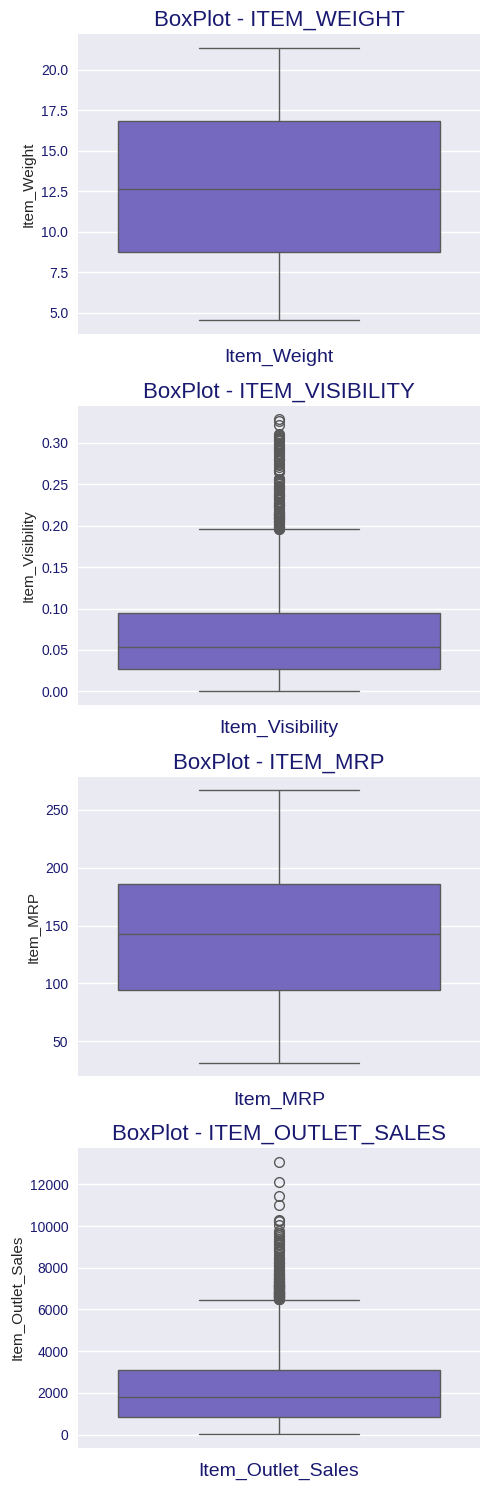

In [188]:
fig, axes = plt.subplots(len(df_graf.columns),1 , figsize=(5,15))
color=['slateblue','cyan','cadetblue','lightblue']
for i, column in enumerate(df_graf.columns):
    ax_box = sns.boxplot(ax=axes[i], data=df_graf[column], orient='v', palette=color) #'Spectral'
    ax_box.set_title(f'BoxPlot - {column.upper()}', fontsize=16, color='midnightblue')
    ax_box.set_xlabel(column, fontsize=14, color='midnightblue')
    ax_box.set_xticklabels(ax_box.get_xticklabels(), rotation=65, color='midnightblue')
    ax_box.set_yticklabels(ax_box.get_yticklabels(), color='midnightblue')

plt.tight_layout()
plt.show()

Eliminamos las variable sque tiene correlacion 0, con nuestra variable objetivo.

In [189]:
df=df.drop(columns=['Item_Weight', 'Outlet_Establishment_Year','Item_Identifier'])

In [190]:
colum_cat=df.select_dtypes(exclude=['int64','float'])
for colum in colum_cat:
    print(f"Categoria {colum}")
    print(sorted(df[colum].unique()))
    print(                                                         )

Categoria Item_Fat_Content
['Low Fat', 'Regular']

Categoria Item_Type
['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']

Categoria Outlet_Identifier
['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']

Categoria Outlet_Size
['High', 'Medium', 'Small']

Categoria Outlet_Location_Type
['Tier 1', 'Tier 2', 'Tier 3']

Categoria Outlet_Type
['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']



In [191]:
df.drop(columns=['Outlet_Identifier', 'Item_Visibility'], inplace=True)

Vemos que 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3' no tienen grnades diferencia entre si, por lo que vamos a considerar a todos como solo 'Supermarket'

In [192]:
df['Outlet_Type']=df['Outlet_Type'].replace({'Supermarket Type1': 'Supermarket','Supermarket Type2': 'Supermarket', 'Supermarket Type3':'Supermarket'})
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket      7437
Grocery Store    1082
Name: count, dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Fat_Content      8519 non-null   object 
 1   Item_Type             8519 non-null   object 
 2   Item_MRP              8519 non-null   float64
 3   Outlet_Size           8519 non-null   object 
 4   Outlet_Location_Type  8519 non-null   object 
 5   Outlet_Type           8519 non-null   object 
 6   Item_Outlet_Sales     8519 non-null   float64
dtypes: float64(2), object(5)
memory usage: 532.4+ KB


#PREPROCESAMIENTO

In [194]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn import set_config
set_config(display='diagram')

In [195]:
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales'])

In [196]:
X.shape

(8519, 6)

In [197]:
y.shape

(8519,)

In [198]:
caract_nom=X.select_dtypes(include= (object))
name_colum=list(caract_nom)
name_colum

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [199]:
cat_colum_nominal = ['Outlet_Type', 'Outlet_Location_Type', 'Item_Type', 'Item_Fat_Content' ] # 'Outlet_Size',
#cat_colum_ordinal1 = ['Item_Fat_Content']
cat_colum_ordinal2 = ['Outlet_Size']
cat_colum_ordinal3 = ['Outlet_Type']
#cat_colum_ordinal3 = ['Outlet_Location_Type']
num_selector = make_column_selector(dtype_include='number')

# Transformadores

one_hot_encoder = OneHotEncoder()
#ordinal_encoder1 = OrdinalEncoder(categories=[['Regular', 'Low Fat']])
ordinal_encoder2 = OrdinalEncoder(categories=[['Small','Medium', 'High' ]])
ordinal_encoder3 = OrdinalEncoder(categories=[['Grocery Store', 'Supermarket']])
#ordinal_encoder3 = OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']])
standard_scaler = StandardScaler()

#one_hot_encoder = OneHotEncoder(drop='first')
#ordinal_encoder = OrdinalEncoder()
#standard_scaler = StandardScaler()

imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

In [200]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_colum_nominal),
                                          (make_pipeline(imputer_cat,ordinal_encoder2), cat_colum_ordinal2),
                                          (make_pipeline(imputer_cat,ordinal_encoder3), cat_colum_ordinal3),
                        remainder = 'passthrough')
#                                          (make_pipeline(imputer_cat,ordinal_encoder1), cat_colum_ordinal1),
#                                          (make_pipeline(imputer_cat,ordinal_encoder2), cat_colum_ordinal2),

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ca3cd4857e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHo...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']]))]),
                                 ['Outlet_Size']),
                                ('pipeline-4',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Grocery '
                                                                              'Store',
                                                                              'Supermarket']]))]),
                                 ['Outlet_Type'])])

In [201]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ca3cd4857e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHo...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']]))]),
                                 ['Outlet_Size']),
                                ('pipeline-4',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Grocery '
                                                                              'Store',
                                                                              'Supermarket']]))]),
                                 ['Outlet_Type'])])

In [202]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux.toarray(),columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pipeline-1__Item_MRP                         8519 non-null   float64
 1   pipeline-2__Outlet_Type_Grocery Store        8519 non-null   float64
 2   pipeline-2__Outlet_Type_Supermarket          8519 non-null   float64
 3   pipeline-2__Outlet_Location_Type_Tier 1      8519 non-null   float64
 4   pipeline-2__Outlet_Location_Type_Tier 2      8519 non-null   float64
 5   pipeline-2__Outlet_Location_Type_Tier 3      8519 non-null   float64
 6   pipeline-2__Item_Type_Baking Goods           8519 non-null   float64
 7   pipeline-2__Item_Type_Breads                 8519 non-null   float64
 8   pipeline-2__Item_Type_Breakfast              8519 non-null   float64
 9   pipeline-2__Item_Type_Canned                 8519 non-null   float64
 10  

,pipeline-1__Item_MRP,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Item_Type_Meat,pipeline-2__Item_Type_Others,pipeline-2__Item_Type_Seafood,pipeline-2__Item_Type_Snack Foods,pipeline-2__Item_Type_Soft Drinks,pipeline-2__Item_Type_Starchy Foods,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-3__Outlet_Size,pipeline-4__Outlet_Type
0,1.746938,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,-1.489096,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0.009762,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.659682,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.399305,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,1.180344,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0
8515,-0.527506,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8516,-0.897362,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8517,-0.608170,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


#División de datos

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, test_size=0.3)

#Entrenamiento del modelo y evaluación:

## Modelo LinearRegression

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
lin_reg = LinearRegression()

Después de llamar a fit, el modelo de regresión lineal estará entrenado y listo para hacer predicciones sobre nuevos datos.

In [206]:
lin_reg.fit(X_train, y_train)

LinearRegression()

##Evaluación del modelo

###Calcular las metricas

In [207]:
print('Metrica de entrenamiento: ',lin_reg.score(X_train, y_train))


Metrica de entrenamiento:  0.5035285096011953


In [208]:
print('Metrica de test: ',lin_reg.score(X_test,y_test))

Metrica de test:  0.48714655546290975


In [209]:
y_pred = lin_reg.predict(X_test)

In [210]:
resultado=pd.DataFrame()
resultado['Y Real']=y_test
resultado['Y Predicho']=y_pred
resultado.reset_index(drop=True)

,Y Real,Y Predicho
0,555.2772,3186.024430
1,488.6972,2113.375316
2,1491.3920,1876.286786
3,747.0276,2093.296902
4,453.4098,2510.288581
...,...,...
2551,490.6946,947.249464
2552,453.4098,816.351512
2553,1166.4816,890.245725
2554,1179.1318,1044.641544


In [211]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)

In [212]:
print('Error absoluto medio: ', mae)
print('Error cuadrático medio: ',mse)
print('Raíz del error cuadrático medio: ',rmse)

Error absoluto medio:  913.0314316580171
Error cuadrático medio:  1493554.8519092447
Raíz del error cuadrático medio:  1222.1108181786317


##Modelo KNN

In [213]:
from sklearn.neighbors import KNeighborsRegressor

In [214]:
knn_reg = KNeighborsRegressor(n_neighbors=7)

In [215]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

##Evaluación del modelo

###Calcular las metricas

In [216]:
print('Metrica de entrenamiento: ',knn_reg.score(X_train, y_train))

Metrica de entrenamiento:  0.6043905125410882


In [217]:
print('Metrica de entrenamiento: ', knn_reg.score(X_test, y_test))

Metrica de entrenamiento:  0.4352601128274284


In [218]:
y_pred = knn_reg.predict(X_test)

In [219]:
resultado=pd.DataFrame()
resultado['Y Real']=y_test
resultado['Y Predicho']=y_pred
resultado.reset_index(drop=True)

,Y Real,Y Predicho
0,555.2772,4663.072971
1,488.6972,409.752343
2,1491.3920,1326.749171
3,747.0276,2347.705914
4,453.4098,2361.117029
...,...,...
2551,490.6946,925.842457
2552,453.4098,444.849514
2553,1166.4816,1125.011771
2554,1179.1318,724.200171


In [220]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)

In [221]:
print('Error absoluto medio: ', mae)
print('Error cuadrático medio: ',mse)
print('Raíz del error cuadrático medio: ',rmse)

Error absoluto medio:  896.348953532305
Error cuadrático medio:  1644660.8822421061
Raíz del error cuadrático medio:  1282.4433251579214


#Modelo RandomForest

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [223]:
rf_reg = RandomForestRegressor(max_depth= 6, n_estimators= 200, random_state=42, bootstrap=True,
                             oob_score=True)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=200, oob_score=True,
                      random_state=42)

In [224]:
print('Metrica de entrenamiento: ',rf_reg.score(X_train, y_train))

Metrica de entrenamiento:  0.5663706057370396


In [225]:
print('Metrica de entrenamiento: ',rf_reg.score(X_test, y_test))

Metrica de entrenamiento:  0.5223006042735054


In [226]:
rf_reg.oob_score_

0.5395849758547102

In [227]:
y_pred = rf_reg.predict(X_test)

In [228]:
resultado=pd.DataFrame()
resultado['Y Real']=y_test
resultado['Y Predicho']=y_pred
resultado.reset_index(drop=True)

,Y Real,Y Predicho
0,555.2772,3120.273964
1,488.6972,581.555372
2,1491.3920,1709.010727
3,747.0276,2216.455606
4,453.4098,2513.941682
...,...,...
2551,490.6946,717.040043
2552,453.4098,296.173177
2553,1166.4816,809.304942
2554,1179.1318,774.949993


In [229]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)

In [230]:
print('Error absoluto medio: ', mae)
print('Error cuadrático medio: ',mse)
print('Raíz del error cuadrático medio: ',rmse)

Error absoluto medio:  829.2053264954012
Error cuadrático medio:  1391177.6509279564
Raíz del error cuadrático medio:  1179.4819417557678


#CONCLUSION

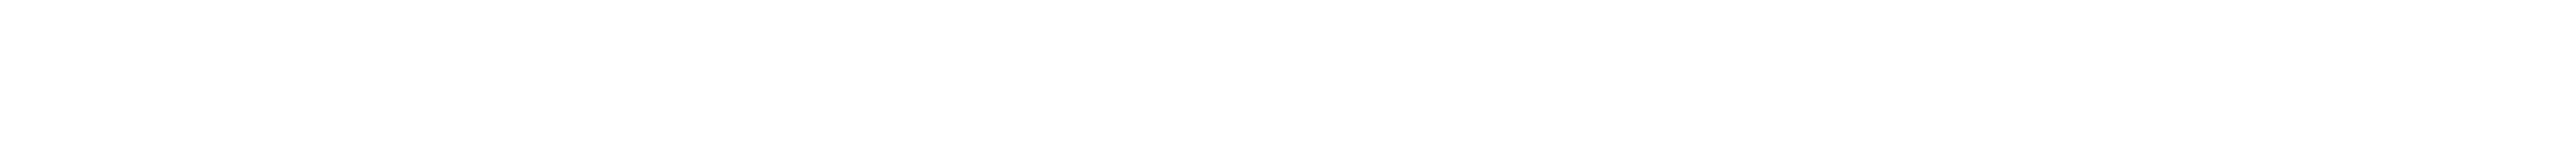